# Programming Project #1: Hybrid Images

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## CS445: Computational Photography

### Part I: Hybrid Images

In [ ]:
# Optional, if using Google Colab w/ Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)



Mounted at /content/drive


In [ ]:
import cv2

import numpy as np
from matplotlib.colors import LogNorm
from scipy import signal

# modify to where you store your project data including utils.py
datadir = "/content/drive/My Drive/hybrid/"

utilfn = datadir + "utils.py"
!cp "$utilfn" .
import utils

In [ ]:
# switch from notebook to inline if using colab or otherwise cannot use interactive display)
# %matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
im1_file = datadir + 'super.jpg'
im2_file = datadir + 'bat.jpg'

im1 = np.float32(cv2.imread(im1_file, cv2.IMREAD_GRAYSCALE) / 255.0)
im2 = np.float32(cv2.imread(im2_file, cv2.IMREAD_GRAYSCALE) / 255.0)

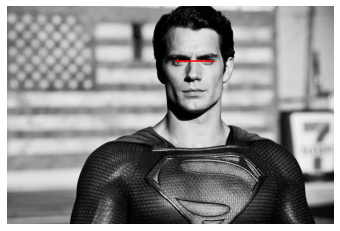

In [ ]:
pts_im1 = utils.prompt_eye_selection(im1)
pts_im1 = np.array([[500,160], [600,160]]) # uncomment if entering [x, y] pts manually
plt.plot(pts_im1[:,0], pts_im1[:,1], 'r-+')

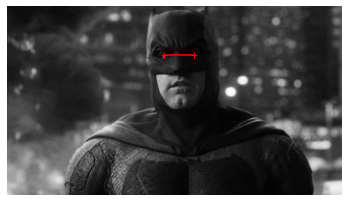

In [ ]:
pts_im2 = utils.prompt_eye_selection(im2)
pts_im2 = np.array([[750,230], [890,230]]) # uncomment if entering [x, y] pts manually
plt.plot(pts_im2[:,0], pts_im2[:,1], 'r-+')

In [ ]:
im1, im2 = utils.align_images(im1_file, im2_file,pts_im1,pts_im2,save_images=False)


In [ ]:
# convert to grayscale
im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY) / 255.0
im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY) / 255.0

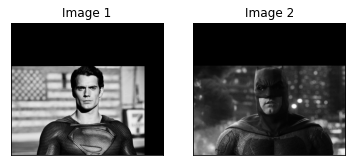

In [ ]:
#Images sanity check
fig, axes = plt.subplots(1, 2)
axes[0].imshow(im1,cmap='gray')
axes[0].set_title('Image 1'), axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(im2,cmap='gray')
axes[1].set_title('Image 2'), axes[1].set_xticks([]), axes[1].set_yticks([]);

In [ ]:
from numpy.core.numeric import identity
def hybridImage(im1, im2, sigma_low, sigma_high):
    '''
    Inputs:
        im1:    RGB (height x width x 3) or a grayscale (height x width) image
                as a numpy array.
        im2:    RGB (height x width x 3) or a grayscale (height x width) image
                as a numpy array.
        sigma_low: standard deviation for the low-pass filter
        sigma_high: standard deviation for the high-pass filter

    Output:
        Return the combination of both images, one filtered with a low-pass filter
        and the other with a high-pass filter.
    '''

    # your code goes here
    low_gauss = utils.gaussian_kernel(sigma_low,60);
    # print(low_gauss.shape);
    # utils.plot(low_gauss);
    # utils.plot_spectrum(low_gauss);
    distant_image = cv2.filter2D(im1,-1,low_gauss)
    # utils.plot(im1);
    # plt.close()
    # utils.plot(distant_image);

    high_gauss = utils.gaussian_kernel(sigma_high,60);
    identity_filter = np.zeros((high_gauss.shape[0],high_gauss.shape[1]))
    identity_filter[60][60]=1
    new_high_gauss = identity_filter - high_gauss

    nearby_image = cv2.filter2D(im2,-1,new_high_gauss)

    return distant_image , nearby_image


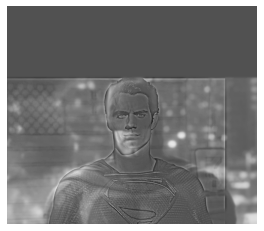

In [ ]:
sigma_low = 3# choose parameters that work for your images
sigma_high = 5

distant_image , nearby_image = hybridImage(im2, im1, sigma_low, sigma_high)

im_hybrid = distant_image + nearby_image
utils.plot(im_hybrid)

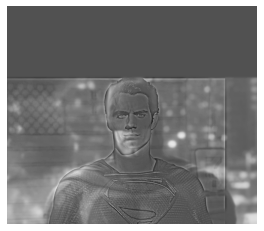

In [ ]:
# Optional: Select top left corner and bottom right corner to crop image
# the function returns dictionary of
# {
#   'cropped_image': np.ndarray of shape H x W
#   'crop_bound': np.ndarray of shape 2x2
# }

cropped_object = utils.interactive_crop(im_hybrid)

Frequency Analysis:


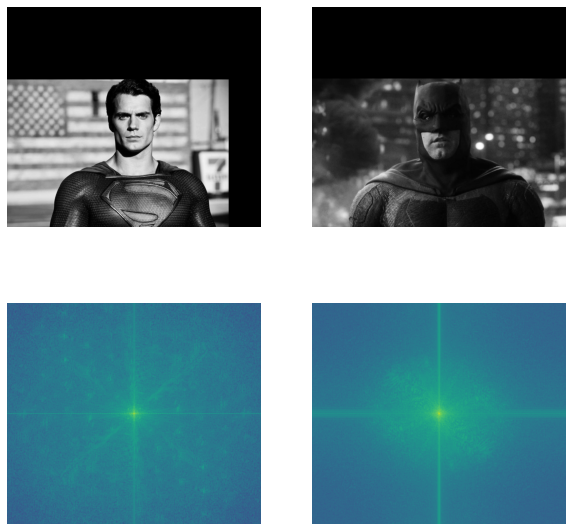

In [ ]:
# Orignal Images
fig = plt.figure(figsize=(10,10))
fig.add_subplot(2, 2, 1)
plt.axis('off')
plt.imshow(im1, cmap='gray')
fig.add_subplot(2, 2, 2)
plt.axis('off')
plt.imshow(im2, cmap='gray')
fig.add_subplot(2, 2, 3)
plt.axis('off')
plt.imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(im1)))))
fig.add_subplot(2, 2, 4)
plt.axis('off')
plt.imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(im2)))))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log


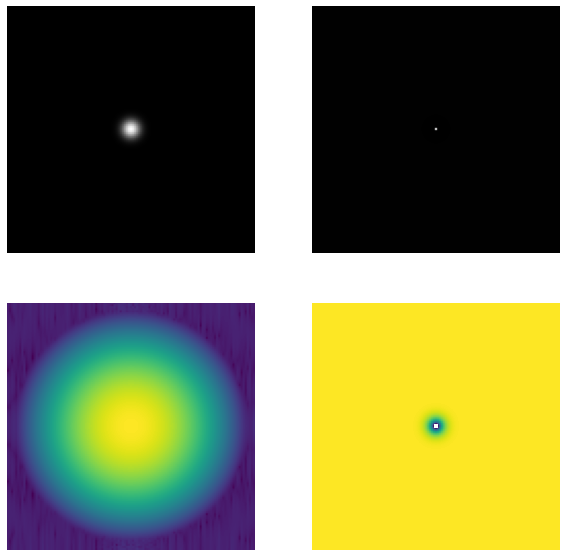

In [ ]:
# Kernel Images
low_gauss = utils.gaussian_kernel(sigma_low,60);

high_gauss = utils.gaussian_kernel(sigma_high,60);
identity_filter = np.zeros((high_gauss.shape[0],high_gauss.shape[1]))
identity_filter[60][60]=1
new_high_gauss = identity_filter - high_gauss

fig = plt.figure(figsize=(10,10))
fig.add_subplot(2, 2, 1)
plt.axis('off')
plt.imshow(low_gauss, cmap='gray')
fig.add_subplot(2, 2, 2)
plt.axis('off')
# plt.imshow(im1, cmap='gray')
plt.imshow(new_high_gauss, cmap='gray')
fig.add_subplot(2, 2, 3)
plt.axis('off')
plt.imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(low_gauss)))))
fig.add_subplot(2, 2, 4)
plt.axis('off')
plt.imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(new_high_gauss)))))


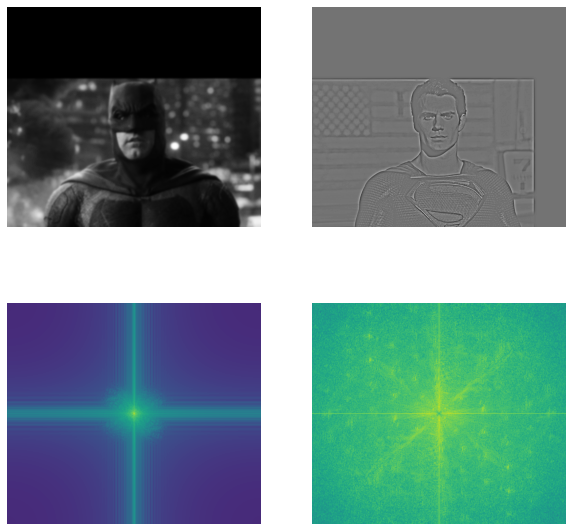

In [ ]:
# Filtered i

distant_image,nearby_image = hybridImage(im2, im1, sigma_low, sigma_high)

fig = plt.figure(figsize=(10,10))
fig.add_subplot(2, 2, 1)
plt.axis('off')
plt.imshow(distant_image, cmap='gray')
fig.add_subplot(2, 2, 3)
plt.axis('off')
plt.imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(distant_image)))))
fig.add_subplot(2, 2, 2)
plt.axis('off')
plt.imshow(nearby_image, cmap='gray')
fig.add_subplot(2, 2, 4)
plt.axis('off')
plt.imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(nearby_image)))))

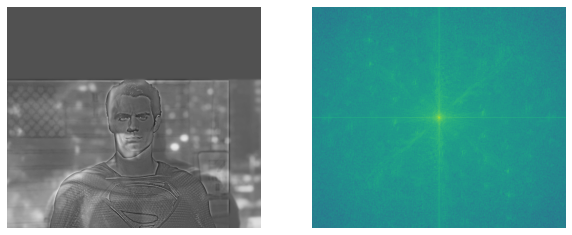

In [ ]:
# Final Images

fig = plt.figure(figsize=(10,10))
fig.add_subplot(2, 2, 1)
plt.axis('off')
plt.imshow(im_hybrid, cmap='gray')
fig.add_subplot(2, 2, 2)
plt.axis('off')
plt.imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(im_hybrid)))))


### Part II: Image Enhancement

##### Two out of three types of image enhancement are required.  Choose a good image to showcase each type and implement a method.  This code doesn't rely on the hybrid image part.

#### Contrast enhancement

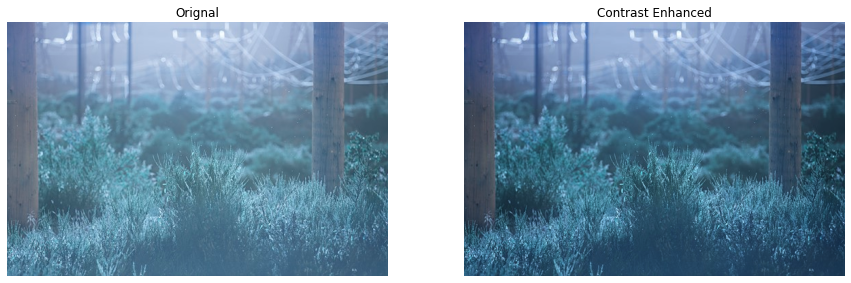

In [ ]:
im3_file = datadir + 'lc.jpg'

im3 = np.float32(cv2.imread(im3_file))
range_adjusted_im3 = im3/255.0
gamma_corrected = range_adjusted_im3**1.5

fig = plt.figure(figsize=(15,15))
fig.add_subplot(2, 2, 1)
plt.axis('off')
plt.title("Orignal")
plt.imshow(range_adjusted_im3)
fig.add_subplot(2, 2, 2)
plt.axis('off')
plt.title("Contrast Enhanced")
utils.plot(gamma_corrected)

#### Color enhancement

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


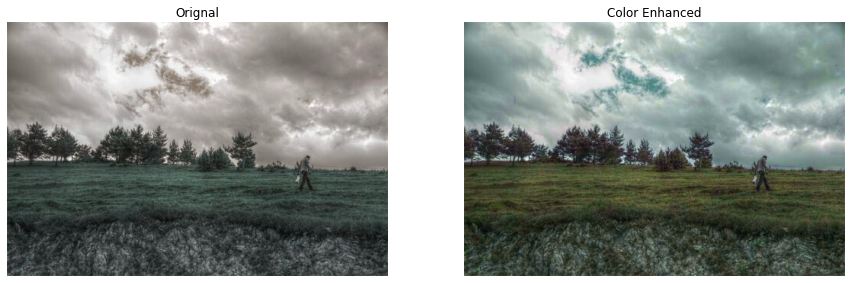

In [ ]:
im4_file = datadir + 'ls.jpg'

im4 = np.float32(cv2.imread(im4_file))
range_adjusted_im4 = im4/255.0
# cv2.calcHist(im3, [0,1,2], None, [256], [0, 256])
hsv = cv2.cvtColor((range_adjusted_im4),cv2.COLOR_BGR2HSV)

hsv[:,:,0] = hsv[:,:,0]*2
hsv[:,:,1] = hsv[:,:,1]*2
N = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
# utils.plot(N)

fig = plt.figure(figsize=(15,15))
fig.add_subplot(2, 2, 1)
plt.axis('off')
plt.title("Orignal")
plt.imshow(range_adjusted_im4)
fig.add_subplot(2, 2, 2)
plt.axis('off')
plt.title("Color Enhanced")
plt.imshow(N)

#### Color shift

In [ ]:
# print(range_adjusted_im3)
lab = cv2.cvtColor(range_adjusted_im3, cv2.COLOR_BGR2Lab)/225.0
# print(lab)
# utils.plot(lab)


